<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S7/S7_AssignmentSolution(Overkill).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision
import numpy as np
import sys


In [2]:
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library')

**Import packages from Drive**

In [0]:
import execute # this is to train & test the model
import image_transformations # to apply different image transformations
import DataLoaders as loader
import visualizeData as viz
import cifar10_models as models # consists of CNN models built on CIFAR10 Dataset

In [0]:
# Apply Image Transforms

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)

fillMeans = (np.array(channel_means)*255).astype(np.uint8)
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

trainTrans = trans.train_transforms([
                                     transforms.RandomRotation((-10.0, 10.0), fill=tuple(fillMeans))
])
testTrans = trans.test_transforms()
                                       

In [6]:
# Load Train & Test Dataset

train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = trainTrans)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = testTrans)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [0]:
# DataLoader for Train & Test

dl = loader.DataLoaders()
trainloader = dl.dataLoader(train)
testloader = dl.dataLoader(test) 


**Show some Images**

plane   dog  deer  deer


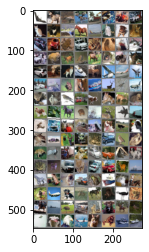

In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
viz.plotImage(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
# Model Summary

!pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print('Device set to', device)
model = models.cfarResNet(False).to(device)
summary(model, input_size=(3, 32, 32))


Device set to cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 34, 34]             432
              ReLU-2           [-1, 16, 34, 34]               0
       BatchNorm2d-3           [-1, 16, 34, 34]              32
           Dropout-4           [-1, 16, 34, 34]               0
            Conv2d-5           [-1, 32, 34, 34]           4,608
              ReLU-6           [-1, 32, 34, 34]               0
       BatchNorm2d-7           [-1, 32, 34, 34]              64
           Dropout-8           [-1, 32, 34, 34]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           9,216
             ReLU-14

In [10]:
incorrect_samples = []
model = models.cfarResNet().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

model1 = execute.Test_Train()
EPOCHS = 15

for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda=1e-5)
  model1.test(model, device, testloader,"model.pt", incorrect_samples)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4917829036712646 Batch_id=390 Accuracy=41.18: 100%|██████████| 391/391 [00:21<00:00, 18.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.2856).  Saving model ...

Test set: Average loss: 1.2856, Accuracy: 5366/10000 (53.66%)

EPOCH: 2


Loss=1.0300959348678589 Batch_id=390 Accuracy=59.33: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.2856 --> 1.0349).  Saving model ...

Test set: Average loss: 1.0349, Accuracy: 6392/10000 (63.92%)

EPOCH: 3


Loss=0.8937960267066956 Batch_id=390 Accuracy=66.80: 100%|██████████| 391/391 [00:21<00:00, 17.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0349 --> 0.9496).  Saving model ...

Test set: Average loss: 0.9496, Accuracy: 6672/10000 (66.72%)

EPOCH: 4


Loss=0.9537581205368042 Batch_id=390 Accuracy=70.63: 100%|██████████| 391/391 [00:21<00:00, 17.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.9496 --> 0.7830).  Saving model ...

Test set: Average loss: 0.7830, Accuracy: 7287/10000 (72.87%)

EPOCH: 5


Loss=0.9991478323936462 Batch_id=390 Accuracy=73.18: 100%|██████████| 391/391 [00:21<00:00, 17.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7830 --> 0.7017).  Saving model ...

Test set: Average loss: 0.7017, Accuracy: 7626/10000 (76.26%)

EPOCH: 6


Loss=1.083734154701233 Batch_id=390 Accuracy=74.93: 100%|██████████| 391/391 [00:22<00:00, 17.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7765, Accuracy: 7291/10000 (72.91%)

EPOCH: 7


Loss=0.6491421461105347 Batch_id=390 Accuracy=76.84: 100%|██████████| 391/391 [00:21<00:00, 17.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7017 --> 0.6927).  Saving model ...

Test set: Average loss: 0.6927, Accuracy: 7640/10000 (76.40%)

EPOCH: 8


Loss=0.8517262935638428 Batch_id=390 Accuracy=77.66: 100%|██████████| 391/391 [00:21<00:00, 17.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6927 --> 0.6320).  Saving model ...

Test set: Average loss: 0.6320, Accuracy: 7781/10000 (77.81%)

EPOCH: 9


Loss=0.6266727447509766 Batch_id=390 Accuracy=78.64: 100%|██████████| 391/391 [00:21<00:00, 17.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6507, Accuracy: 7748/10000 (77.48%)

EPOCH: 10


Loss=0.692327618598938 Batch_id=390 Accuracy=80.06: 100%|██████████| 391/391 [00:21<00:00, 17.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6320 --> 0.6132).  Saving model ...

Test set: Average loss: 0.6132, Accuracy: 7906/10000 (79.06%)

EPOCH: 11


Loss=0.5623703002929688 Batch_id=390 Accuracy=81.34: 100%|██████████| 391/391 [00:21<00:00, 17.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6132 --> 0.5227).  Saving model ...

Test set: Average loss: 0.5227, Accuracy: 8208/10000 (82.08%)

EPOCH: 12


Loss=0.8742426037788391 Batch_id=390 Accuracy=82.96: 100%|██████████| 391/391 [00:21<00:00, 17.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5227 --> 0.4886).  Saving model ...

Test set: Average loss: 0.4886, Accuracy: 8336/10000 (83.36%)

EPOCH: 13


Loss=0.5105279684066772 Batch_id=390 Accuracy=84.24: 100%|██████████| 391/391 [00:22<00:00, 17.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4886 --> 0.4858).  Saving model ...

Test set: Average loss: 0.4858, Accuracy: 8350/10000 (83.50%)

EPOCH: 14


Loss=0.5793571472167969 Batch_id=390 Accuracy=86.05: 100%|██████████| 391/391 [00:21<00:00, 17.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4858 --> 0.4652).  Saving model ...

Test set: Average loss: 0.4652, Accuracy: 8443/10000 (84.43%)

EPOCH: 15


Loss=0.5006418228149414 Batch_id=390 Accuracy=86.96: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]


Validation loss has  decreased (0.4652 --> 0.4549).  Saving model ...

Test set: Average loss: 0.4549, Accuracy: 8477/10000 (84.77%)



Text(0.5, 1.0, 'Test Accuracy')

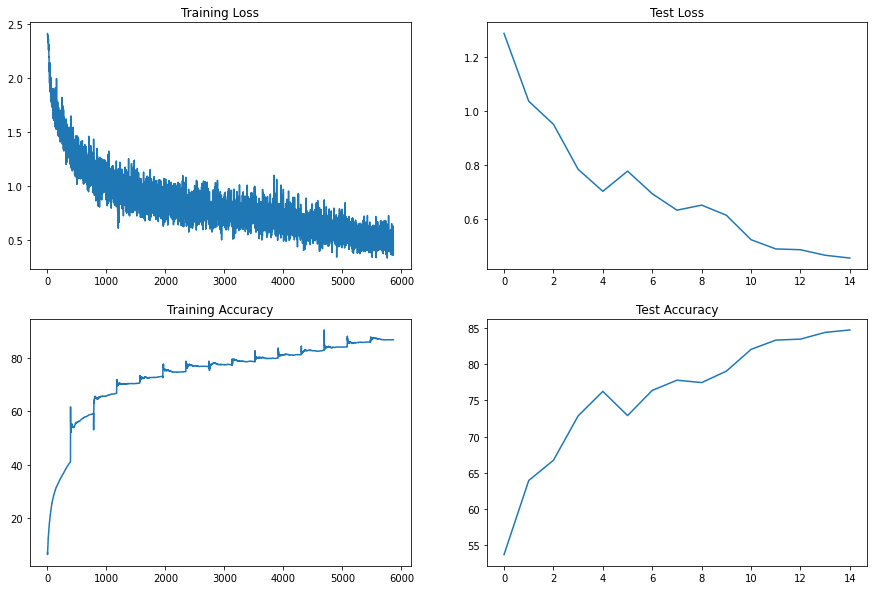

In [11]:
# Plot Train & Test Stats( i.e Loss & Accuracy)
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")


Misclassifed Images from Model
******************************


<Figure size 936x936 with 0 Axes>

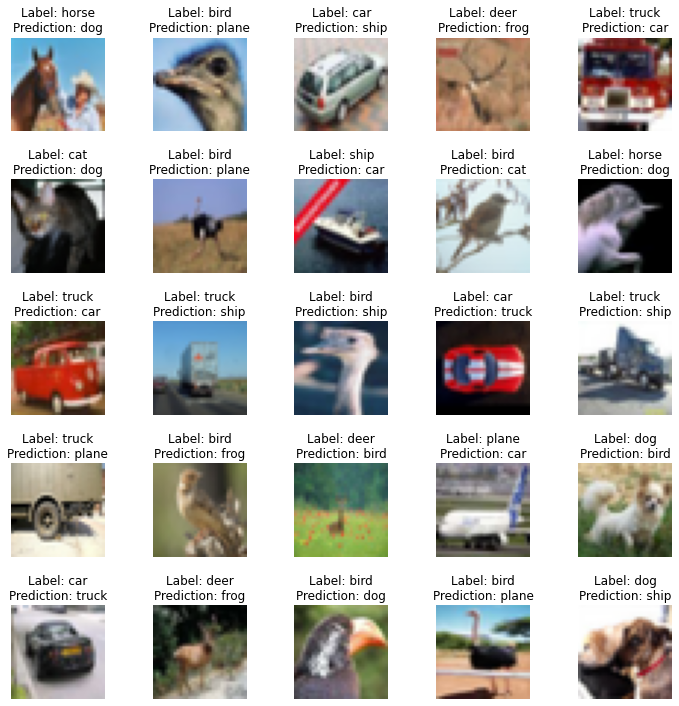

In [22]:
print('Misclassifed Images from Model')
print('*'*30)

from google.colab import files

def misclassifiedOnes(model,testloader, data,filename):
  model = model.to(device)
  dataiter = iter(testloader) 
  count = 0
  
  # Initialize plot
  fig = plt.figure(figsize=(13,13))
  row_count = -1
  fig, axs = plt.subplots(5, 5, figsize=(10, 10))
  fig.tight_layout()

  for idx, result in enumerate(data):
    # If 25 samples have been stored, break out of loop
    if idx > 24:
      break
        
    rgb_image = np.transpose(result['image'], (1, 2, 0)) / 2 + 0.5
    label = result['label'].item()
    prediction = result['prediction'].item()

    # Plot image
    if idx % 5 == 0:
      row_count += 1
    axs[row_count][idx % 5].axis('off')
    axs[row_count][idx % 5].set_title(f'Label: {classes[label]}\nPrediction: {classes[prediction]}')
    axs[row_count][idx % 5].imshow(rgb_image)
    
  # save the plot
  plt.savefig(filename)
  files.download(filename)

model.load_state_dict(torch.load("model.pt")) 
misclassifiedOnes(model,testloader, incorrect_samples,'CIFAR10.png')
